In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LoanApprovalPrediction.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.shape)


(598, 13)


In [ ]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [ ]:
# Get the null values in the DataFrame
null_values = df.isnull().sum()

print(null_values)


Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [ ]:
##As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using

df.drop(['Loan_ID'],axis=1,inplace=True)


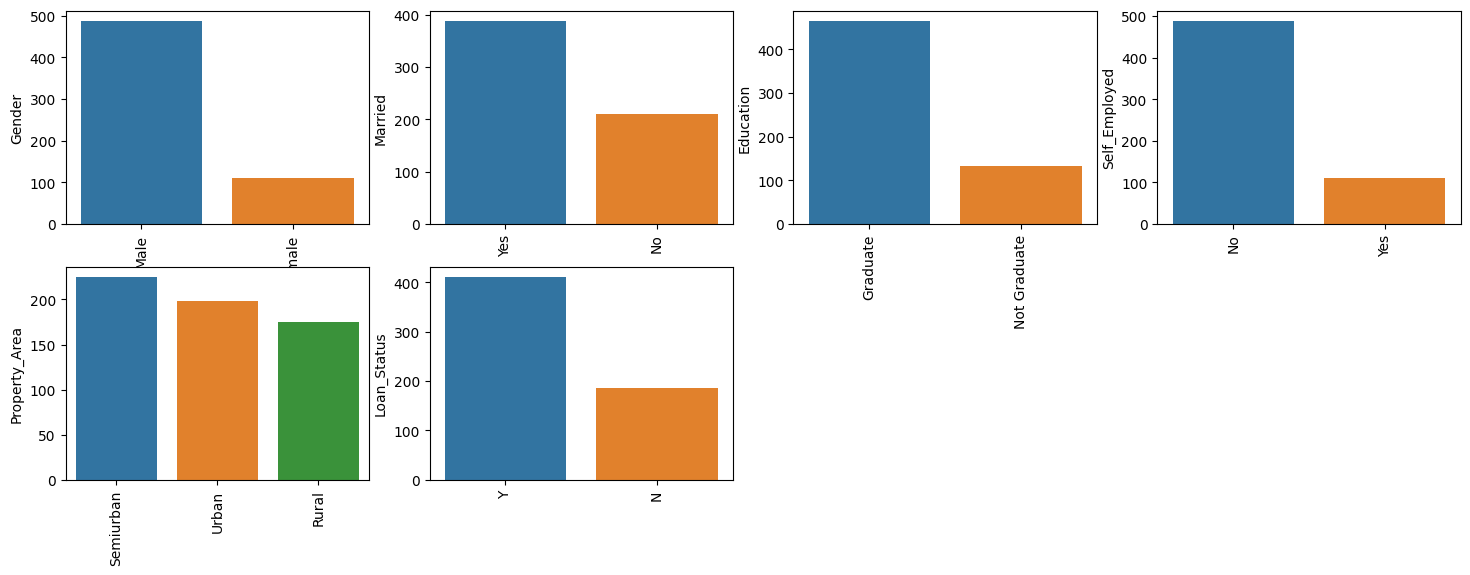

In [ ]:
#show which value is dominating as per our dataset.
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
 y = df[col].value_counts()
 plt.subplot(11,4,index)
 plt.xticks(rotation=90)
 sns.barplot(x=list(y.index), y=y)
 index +=1



In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])


In [ ]:
# To find the number of columns with
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<Axes: >

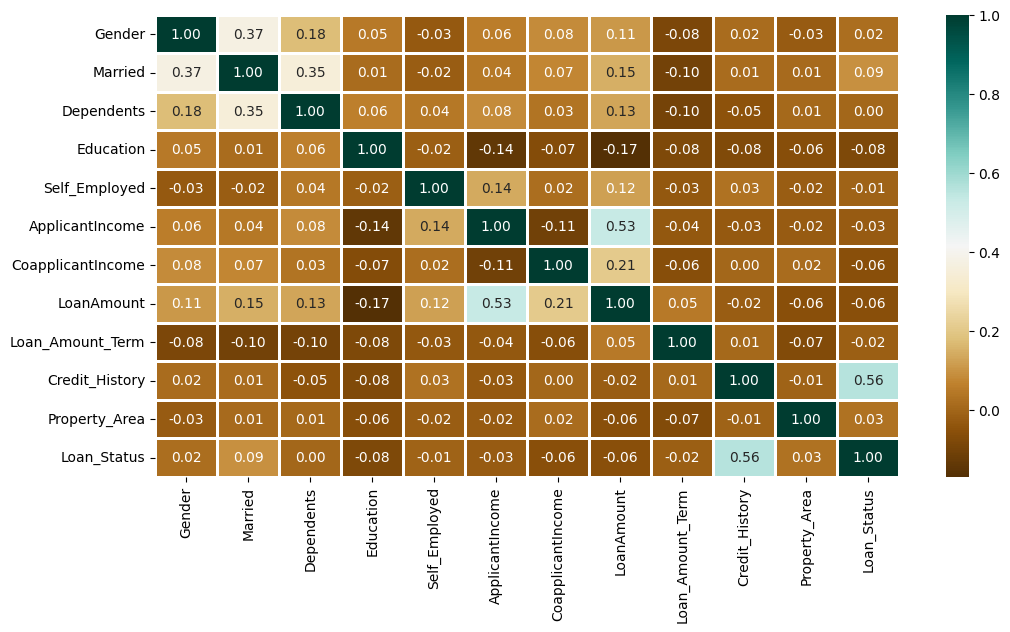

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',
			linewidths=2,annot=True)


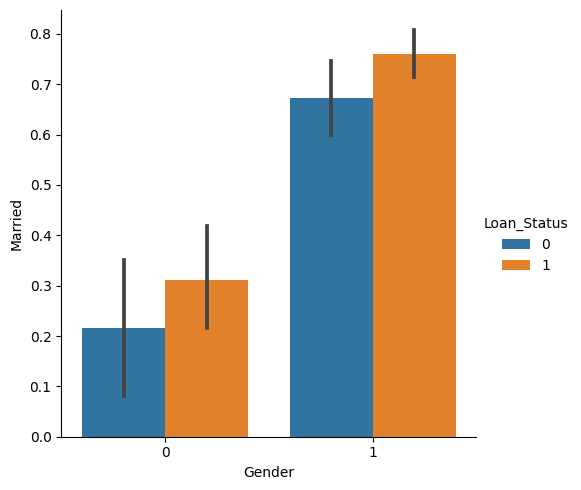

In [ ]:
sns.catplot(x="Gender", y="Married",
			hue="Loan_Status",
			kind="bar",
			data=df)


In [ ]:
for col in df.columns:
 df[col] = df[col].fillna(df[col].mean())

df.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
print(df.isna().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier


In [ ]:
class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            # Randomly select a subset of features
            selected_features = np.random.choice(X.shape[1], size=int(np.sqrt(X.shape[1])), replace=False)

            # Create a decision tree classifier
            dt = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)

            # Train the decision tree on the selected features
            dt.fit(X[:, selected_features], y)

            # Append the trained decision tree to the ensemble
            self.estimators.append((selected_features, dt))

    def predict(self, X):
        # Make predictions for each decision tree in the ensemble
        predictions = np.zeros((X.shape[0], len(self.estimators)))
        for i, (selected_features, dt) in enumerate(self.estimators):
            predictions[:, i] = dt.predict(X[:, selected_features])

        # Aggregate predictions using majority voting
        majority_votes = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=predictions)
        return majority_votes


In [ ]:
df.dtypes

Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy like 'median' or 'most_frequent'

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Use the same imputer to transform your test data
X_test_imputed = imputer.transform(X_test)


In [ ]:
# Drop rows with missing values from both training and test data
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Update the target variable accordingly
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Update the target variable accordingly


In [ ]:
from sklearn.model_selection import train_test_split


# Define your feature matrix X and target variable y
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X.shape, y.shape  # This line is optional, but it prints the shapes for verification

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=1)

# Instantiate a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=7,
                                       criterion='entropy',
                                       random_state=7)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rf_classifier.predict(X_test)





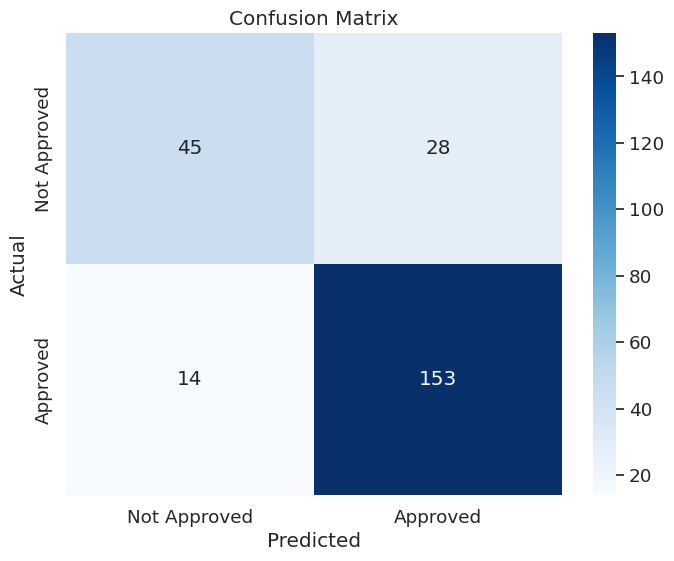

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Set labels for the classes
class_names = ['Not Approved', 'Approved']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.825


In [ ]:
from sklearn.metrics import precision_score
# Calculate precision
precision = precision_score(y_test, y_pred)
# Print the precision score
print("Precision:", precision)


Precision: 0.8453038674033149


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.9161676646706587


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 0.8793103448275862


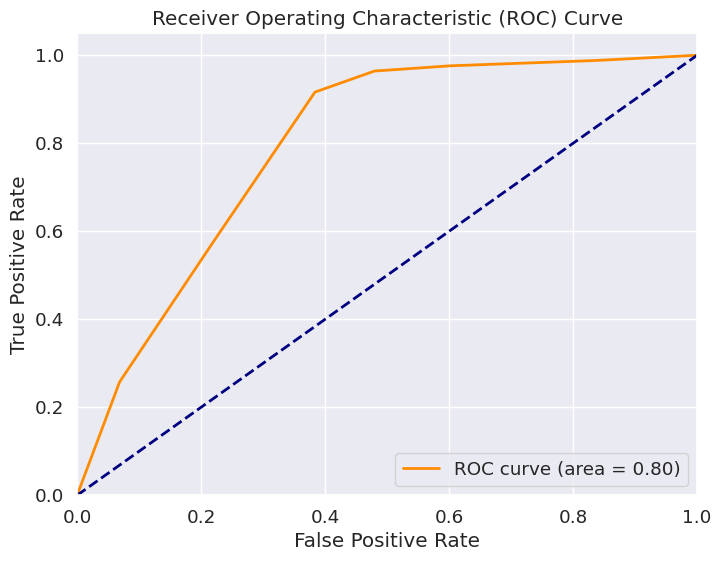

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute predicted probabilities of the positive class (class 'Approved')
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
